In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# get master dict and convert to df
_dict = M.gather_dicts()
df = pd.DataFrame.from_dict(_dict)
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,...,test14,test15,test16,test17,test18,test19,test20,test21,test22,test23
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,...,Inspiron 13-5378,HP ProBook 4530s,HP ProBook 4530s,Inspiron 13-5378,HP ProBook 4530s,Inspiron 13-5378,Inspiron 13-5378,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...",...,"{'time': ['14:32:27', '14:32:51', '14:37:59', ...","{'time': ['14:33:51', '14:38:11', '14:40:45', ...","{'time': ['20:40:05', '20:41:36', '20:46:18', ...","{'time': ['20:38:44', '20:41:07', '20:45:26', ...","{'time': ['20:32:08', '20:35:44', '20:38:53', ...","{'time': ['20:43:00', '20:43:26', '20:45:09', ...","{'time': ['12:14:38', '12:15:51', '12:20:27', ...","{'time': ['12:58:07', '12:58:36', '13:03:25', ...","{'time': ['14:02:31', '14:05:38', '14:10:09', ...","{'time': ['15:16:49', '15:20:24', '15:24:12', ..."
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,...,2020-06-11,2020-06-11,2020-06-11,2020-06-11,2020-06-12,2020-06-12,2020-06-13,2020-06-13,2020-06-13,2020-06-13
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,upper east,upper west,upper east,upper west,upper west,upper east,upper west,upper east,lower west,lower west NEW


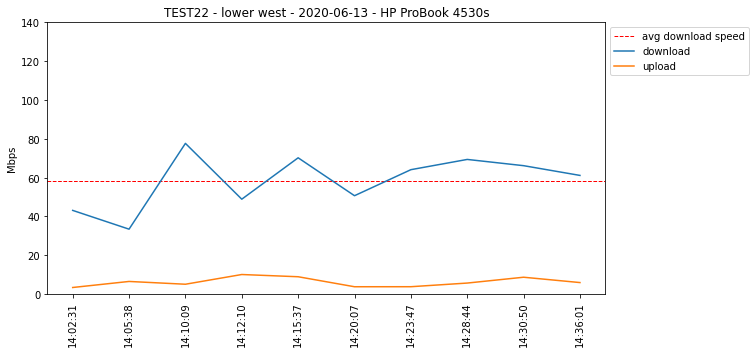

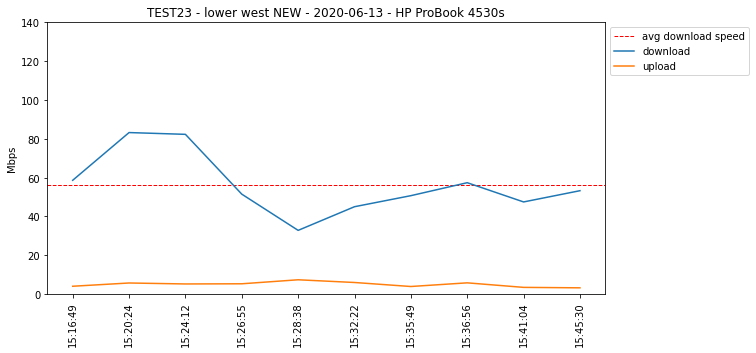

In [5]:
M.plot_single(df, 'test22');
M.plot_single(df, 'test23')

In [26]:
data = M.transform_data(df)
data

,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,...,upper east,upper west,upper east,upper west,upper west,upper east,upper west,upper east,lower west,lower west NEW
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672,...,26.205842,21.185368,27.358890,46.010426,57.744886,18.588056,43.798864,41.856740,43.092668,58.593486
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280,...,21.098576,39.741156,31.470254,50.345134,79.300667,7.933640,61.898113,49.722467,33.420106,83.177536
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744,...,30.269488,34.428683,21.980625,33.241564,19.833408,8.694836,53.549835,54.260856,77.607714,82.263593
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649,...,21.880183,32.683678,33.016687,50.634500,40.147412,20.432004,21.076925,46.827994,48.858853,51.457700
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984,...,21.213800,19.831074,11.809895,18.596342,33.480674,33.255824,35.553872,53.120251,70.179552,32.801772
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930,...,29.848186,45.090253,33.968360,54.433133,52.686691,36.315992,63.803415,48.271980,50.651072,44.986142
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007,...,33.410585,39.163804,39.251724,42.779460,31.807893,39.321488,67.488455,57.493984,64.060100,50.675471
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574,...,31.342952,65.907274,35.641470,52.199049,76.557328,24.246971,36.191896,21.855815,69.339780,57.353136
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818,...,28.034869,53.513333,17.682013,29.278794,60.879036,22.681044,34.648943,51.377295,66.123071,47.443467
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466,...,19.187630,32.014880,36.062321,37.278490,56.729713,13.956912,38.140461,25.460835,61.106145,53.237558


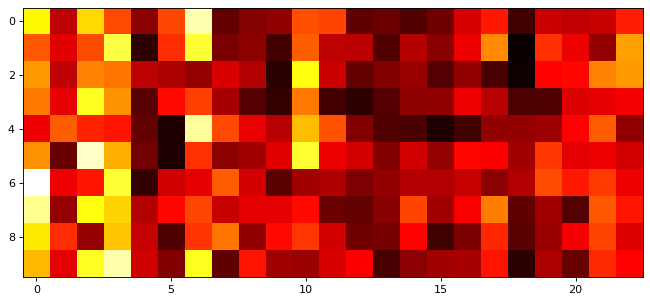

In [7]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

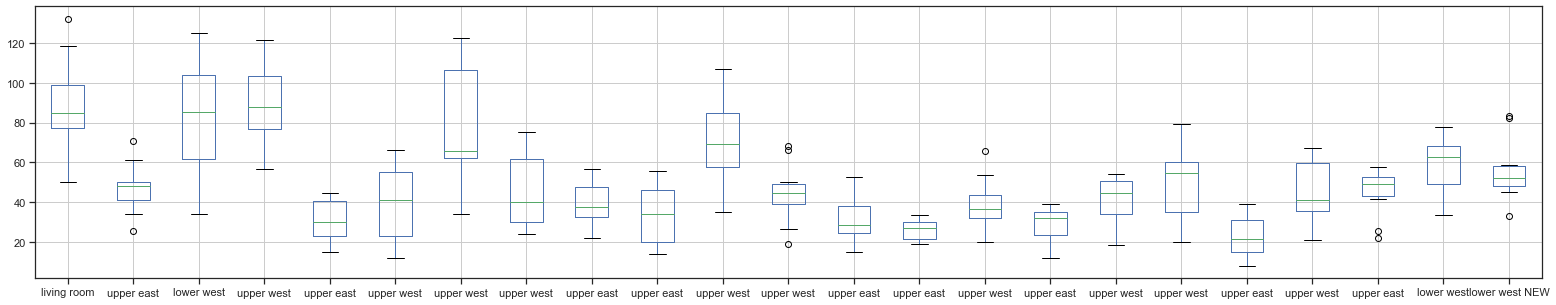

In [24]:
fig, ax = plt.subplots(ncols=1, figsize=(27,5))
ax.set_xticklabels(data.columns,  rotation=45, rotation_mode="anchor")
data.boxplot();

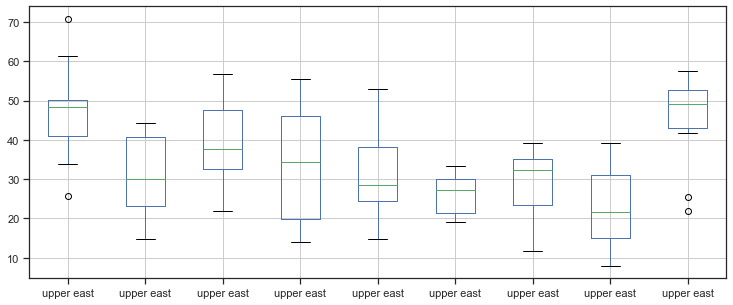

In [28]:
fig, ax = plt.subplots(ncols=1, figsize=(12.5,5))
data['upper east'].boxplot();

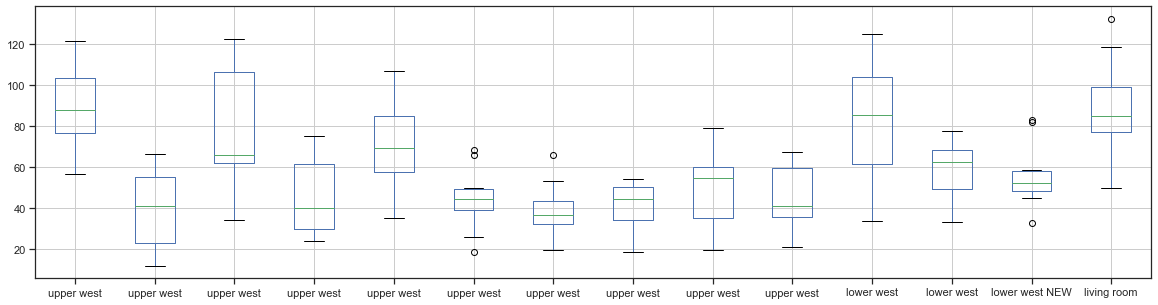

In [31]:
fig, ax = plt.subplots(ncols=1, figsize=(20,5))
data[['upper west','lower west', 'lower west NEW','living room']].boxplot();